In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
#missing values


In [13]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
#there are no missing values in the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [18]:
df = df.drop(labels=['id'], axis=1)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [21]:
#check for duplicate records
df.duplicated().sum()

0

In [22]:
#there are no duplicate records

In [23]:
df.drop_duplicates() #use to drop duplicate records

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [24]:
#segregate numerical and categorical columns

In [29]:
numerical_columns = df.columns[df.dtypes != 'object']
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [31]:
categorical_columns = df.columns[df.dtypes == 'O']
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [33]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [35]:
df[df['cut'] == 'Ideal']

#freq is number of times the most repeating value occured 

,carat,cut,color,clarity,depth,table,x,y,z,price
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
11,0.23,Ideal,E,VVS2,62.0,57.0,3.96,3.98,2.46,505
...,...,...,...,...,...,...,...,...,...,...
193560,0.40,Ideal,E,VS2,62.9,57.0,4.69,4.64,2.94,1003
193561,0.30,Ideal,E,VS1,62.4,55.0,4.30,4.33,2.69,800
193566,1.05,Ideal,G,VS1,62.1,56.0,6.54,6.51,4.06,7397
193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872


In [37]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [38]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

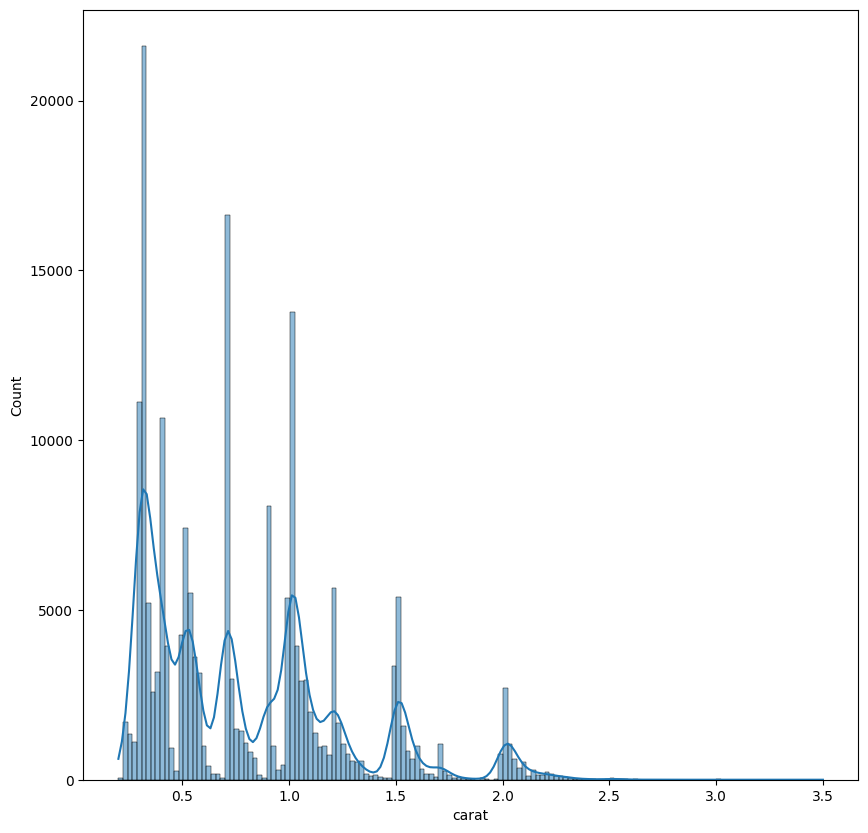

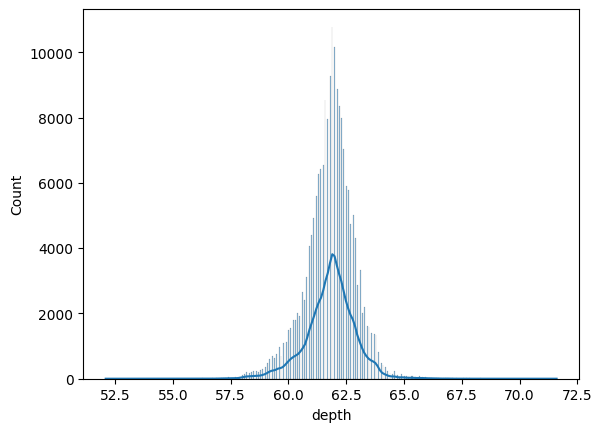

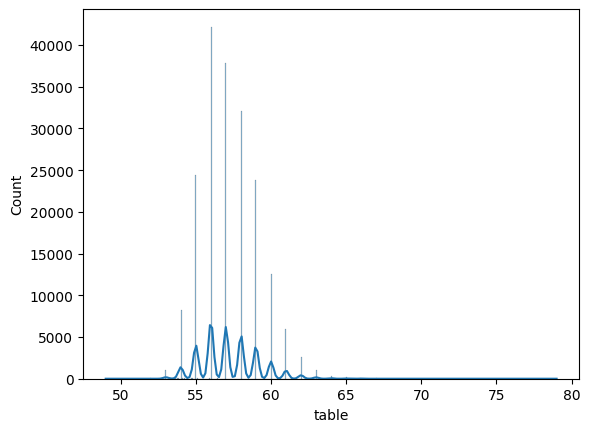

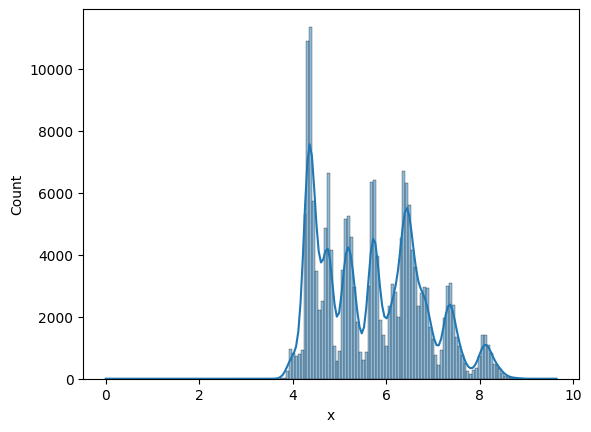

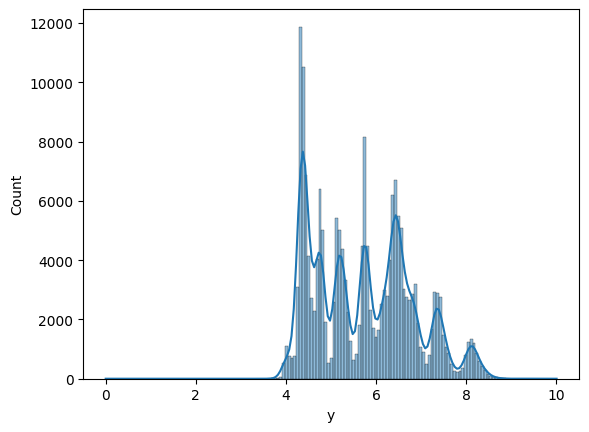

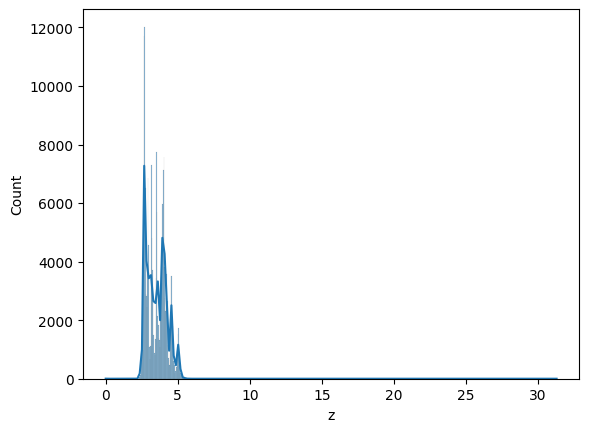

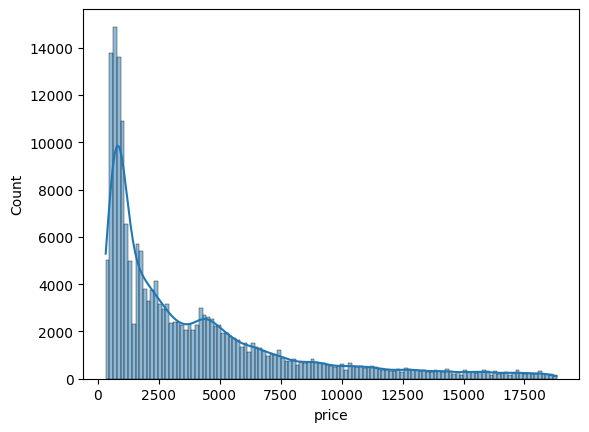

In [41]:
plt.figure(figsize=(10,10))
x = 1

for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


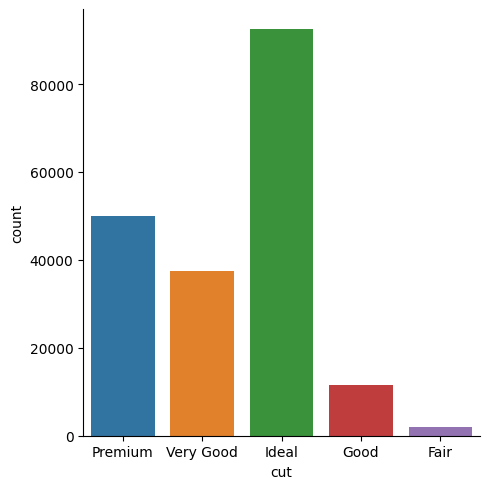

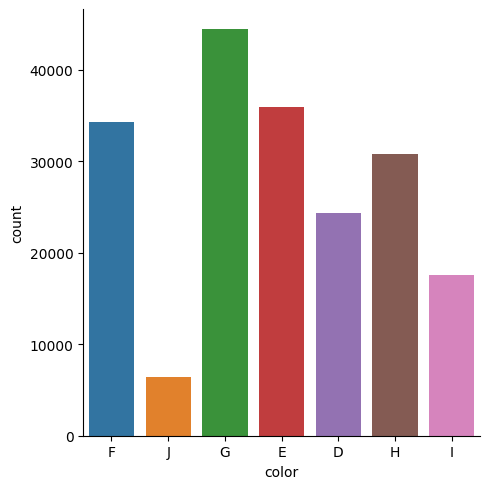

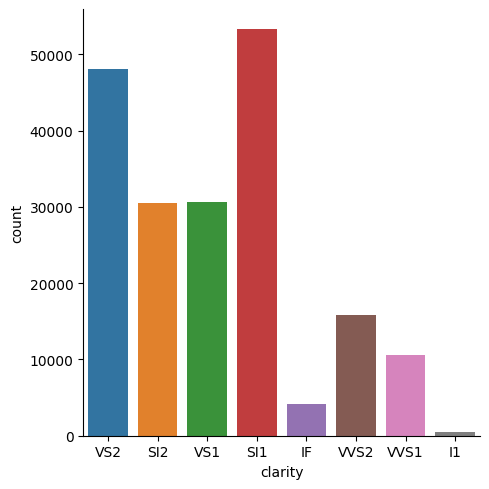

In [53]:
for i in categorical_columns:
    sns.catplot(data=df, x=i, kind="count")
    print('\n')
    plt.show()

In [54]:
#correlation

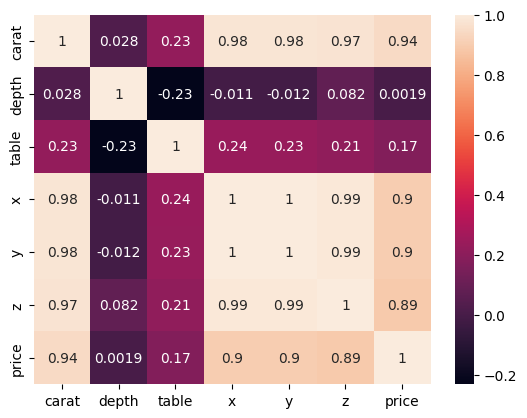

In [60]:
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.show()

In [66]:
#because of high corelation between x,y,z with carat
#therefore dropping x,y,z columns

#can also drop depth as it is hardly corelated with price

In [65]:
df.drop(labels=['x','y','z'], axis=1) #currently we are not dropping these columns
#to compare the accuracy without and with dropping these columns

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


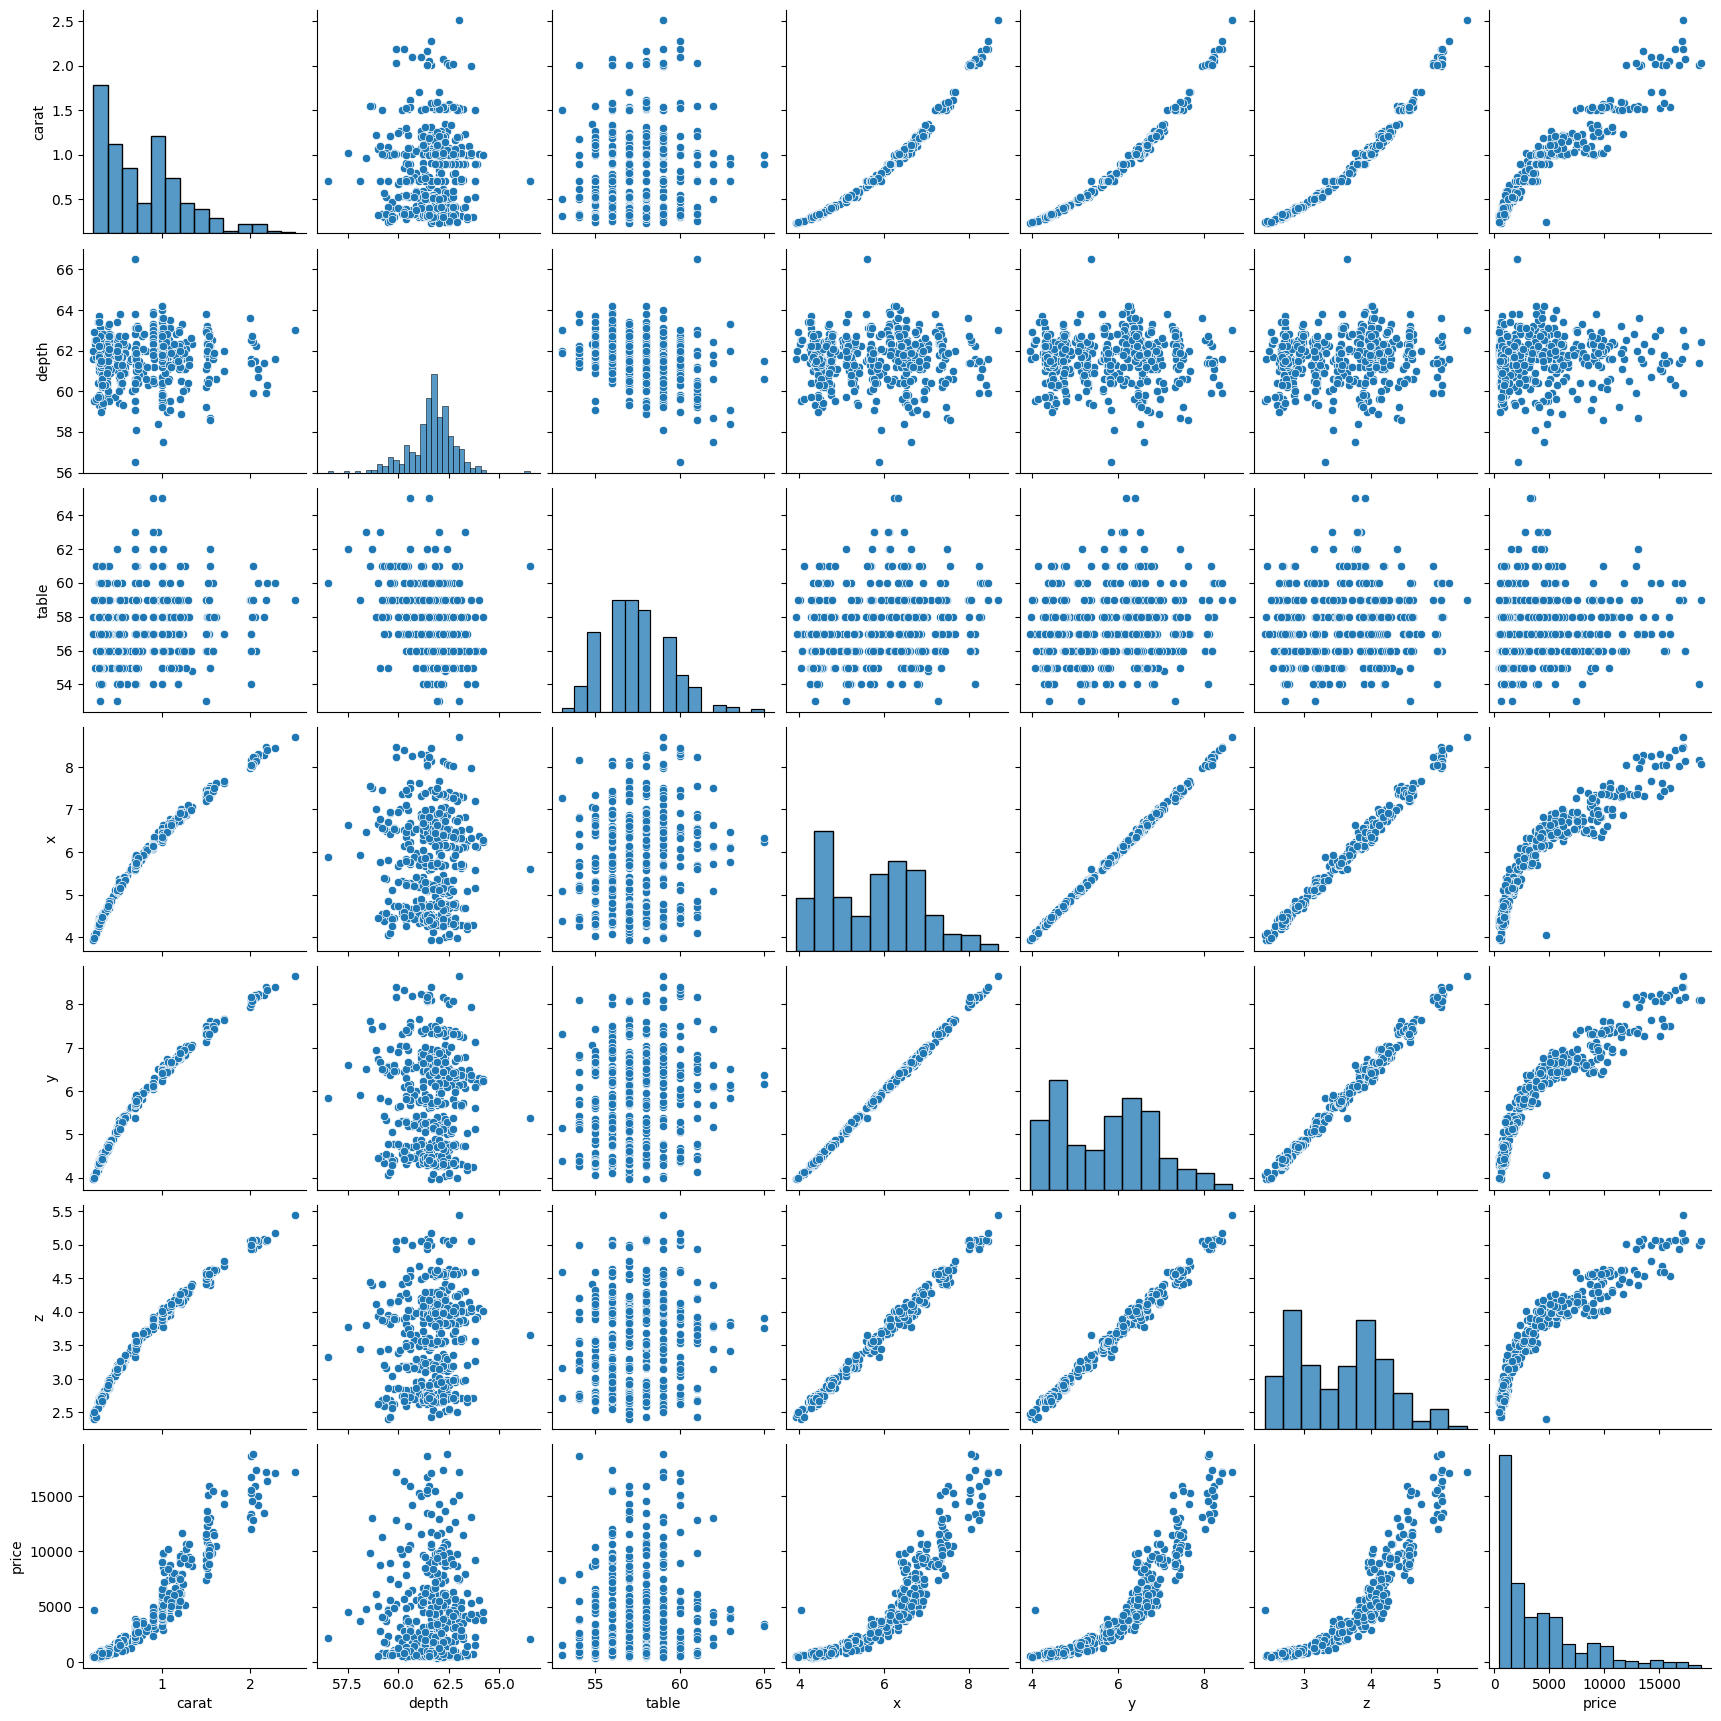

In [30]:
sns.pairplot(data=df.sample(500))
plt.show()

In [67]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [68]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [81]:
cut_map = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
#1 is least and 5 is higer value

In [82]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [83]:
clarity_map = {'I1':1, 'SI2':2,  'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [84]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [85]:
color_map = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

In [86]:
#all the mapping is applied based on the research and the domain knowledge

In [88]:
df['cut'] = df['cut'].replace(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [89]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
